# Задача Т4

In [19]:
import numpy as np
import matplotlib.pyplot as plt

### Параметры задачи

In [20]:
n = 100
theta = 50
beta = 0.95

### Генерация выборки

In [76]:
# разыгрываем случайную равномерно распределенную на [0,1] величину 
s = np.random.uniform(0,1,n)


def inverse_f(y):
    return (y * theta) + theta

sample = [inverse_f(i) for i in s]
print(sample)

[92.60978187672798, 88.15003404526675, 79.61294021997112, 65.33897757821197, 77.5504306113442, 78.46641530310612, 89.84788982762005, 77.91131042099202, 72.33654118986188, 97.26434785720164, 98.56449336670376, 57.047955412206505, 88.3307752137967, 85.70633456594304, 65.3195178374247, 93.00258962433495, 55.36443550350845, 79.5347807938485, 97.08556736566084, 76.27565224468535, 63.0471942063309, 95.34675697201627, 95.6710077959123, 69.74691730665123, 99.59843617771912, 57.68828670822826, 59.446160329853384, 75.4720628555211, 98.44224787392854, 72.34110906485604, 53.73575514722094, 98.32702391693259, 63.52127961438015, 74.92815063100198, 82.07626484956748, 94.35053611490073, 67.07699460910257, 65.30495499105068, 79.19147086030645, 81.7435596296814, 57.384178348043406, 84.78982406171349, 80.36322638397586, 82.6245586356554, 82.86030782689619, 84.98088098023501, 67.04625456801, 59.91135539997238, 76.1541800450697, 69.90739613049823, 62.857533264262756, 72.84504975328261, 81.68954737262526, 7

### Точный доверительный интервал

In [62]:
x_max = np.max(sample)

f1_exact = x_max / (1 + (1/2 + beta/2)**(1/n))
f2_exact = x_max / (1 + (1/2 - beta/2)**(1/n))

print(f1_exact, " < \u03F4 < ", f2_exact)

49.726749390754634  < ϴ <  50.63741517698968


### Ассимптотический: ОММ

In [63]:
# 1 и 2 моменты
moment_1 = np.mean(sample)
moment_2 = 0

for i in range (0, n):
    moment_2 += 1/n*(sample[i])**2
    
f1_omm = ((-1.96 * (2/3) * (moment_2 - moment_1 ** 2) ** (1/2)) / n**(1/2)) + (2/3) * moment_1
f2_omm = ((1.96 * (2/3) * (moment_2 - moment_1 ** 2) ** (1/2)) / n**(1/2)) + (2/3) * moment_1

print(f1_omm, " < \u03F4 < ", f2_omm)

48.436941419332754  < ϴ <  52.13985706443887


### Bootstrap (непараметрический) - используем только выборку

####  Используем самую эффективную оценку θ_3 

In [64]:
# делаем 1000 подвыборок объема n с повторениями по исходной выборке

N = 1000

deltas = []
original_theta = 1/5 * (np.min(sample) + 2*np.max(sample))
print("Тета с волной: ", original_theta)

for i in range(N):
    # генерируем массив индексов
    tmp_sample = []
    sample_indeces = np.random.randint(0, n, n);
    
    for j in range(n):
        tmp_sample.append(sample[sample_indeces[j]])
    
    tmp_theta = 1/5 * (np.min(tmp_sample) + 2*np.max(tmp_sample))
    deltas.append(tmp_theta - original_theta)

# вариационный ряд из дельт
deltas.sort()
    
# квантили
k1 = int((1/2 - beta/2) * N)
k2 = int((1/2 + beta/2) * N)

f1_bootstrap = original_theta - deltas[k1 - 1]
f2_bootstrap = original_theta - deltas[k2 - 1]

print(f2_bootstrap, " < \u03F4 < ", f1_bootstrap)


Тета с волной:  49.866039557055714
49.65987384384112  < ϴ <  51.367945403485066


### Сравнение интервалов

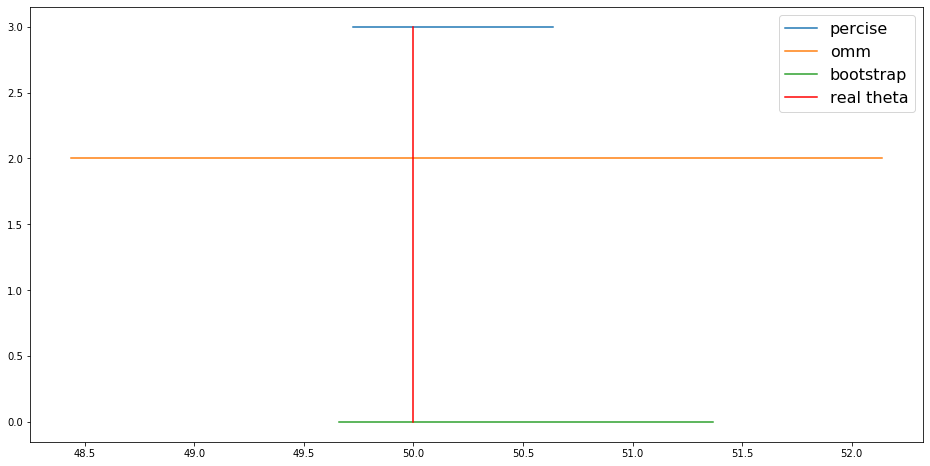

In [85]:
plt.figure(figsize=(16, 8))

plt.plot([f1_exact, f2_exact], [3, 3], label = "percise")
plt.plot([f1_omm, f2_omm], [2, 2], label = "omm")
plt.plot([f1_bootstrap, f2_bootstrap], [0, 0], label = "bootstrap")
plt.plot([theta, theta], [0, 3], color = "red", label = "real theta")

plt.legend(prop={'size': 16})
plt.show()

Точный метод постоения доверительного интервала - самый точный :)